In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc

from jupyterthemes import jtplot
jtplot.style()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/gordee-ext/OneDrive - Louis Dreyfus Company/Desktop/Netology/Моудль 4/Итоговая/data.csv")

In [3]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [4]:
data.info()
#7 объектов и 5 числовых данных.
#Необходимо конфертировать типы данных object в числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#Подсчет кол-ва пропусков по каждой переменной 
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#Нужно заменить пропуски у переменной Item_weight
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [8]:
#Выберем стратегрию удаления значений для категориальной переменной
data=data.dropna()
#dummies = pd.get_dummies(data['Outlet_Size'])

In [9]:
#Переменные, которые являются идентификатором, можно удалить, т.к они не важны
data=data.drop('Item_Identifier', axis = 1)
data=data.drop('Outlet_Identifier', axis = 1)

In [10]:
#замена на числовые значения
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'LF': 0, 'Low Fat': 0, 'Regular': 1,'low fat': 0, 'reg': 1})
data_encoder=data.apply(LabelEncoder().fit_transform)  #можно использовать OneHotEncoder

In [12]:
data_encoder.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,279,0,494,4,4427,3,1,0,1,2227


In [13]:
data_encoder.info()
data_encoder.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  6113 non-null int64
Item_Fat_Content             6113 non-null int64
Item_Visibility              6113 non-null int64
Item_Type                    6113 non-null int32
Item_MRP                     6113 non-null int64
Outlet_Establishment_Year    6113 non-null int64
Outlet_Size                  6113 non-null int32
Outlet_Location_Type         6113 non-null int32
Outlet_Type                  6113 non-null int32
Item_Outlet_Sales            6113 non-null int64
dtypes: int32(4), int64(6)
memory usage: 429.8 KB


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,279,0,494,4,4427,3,1,0,1,2227


In [14]:
#смотрим какие значения есть в каждом объекте по порядку и если возможно заменяем на числовые значения
#data.groupby('Item_Fat_Content').count()  #всего два вида: Regular and Low Fat. Можно заменить на 0,1
#data.groupby('Item_Type').count()  # имеется 16 видов продуктов
#data.groupby('Outlet_Location_Type').count()
#data.groupby('Outlet_Type').count()

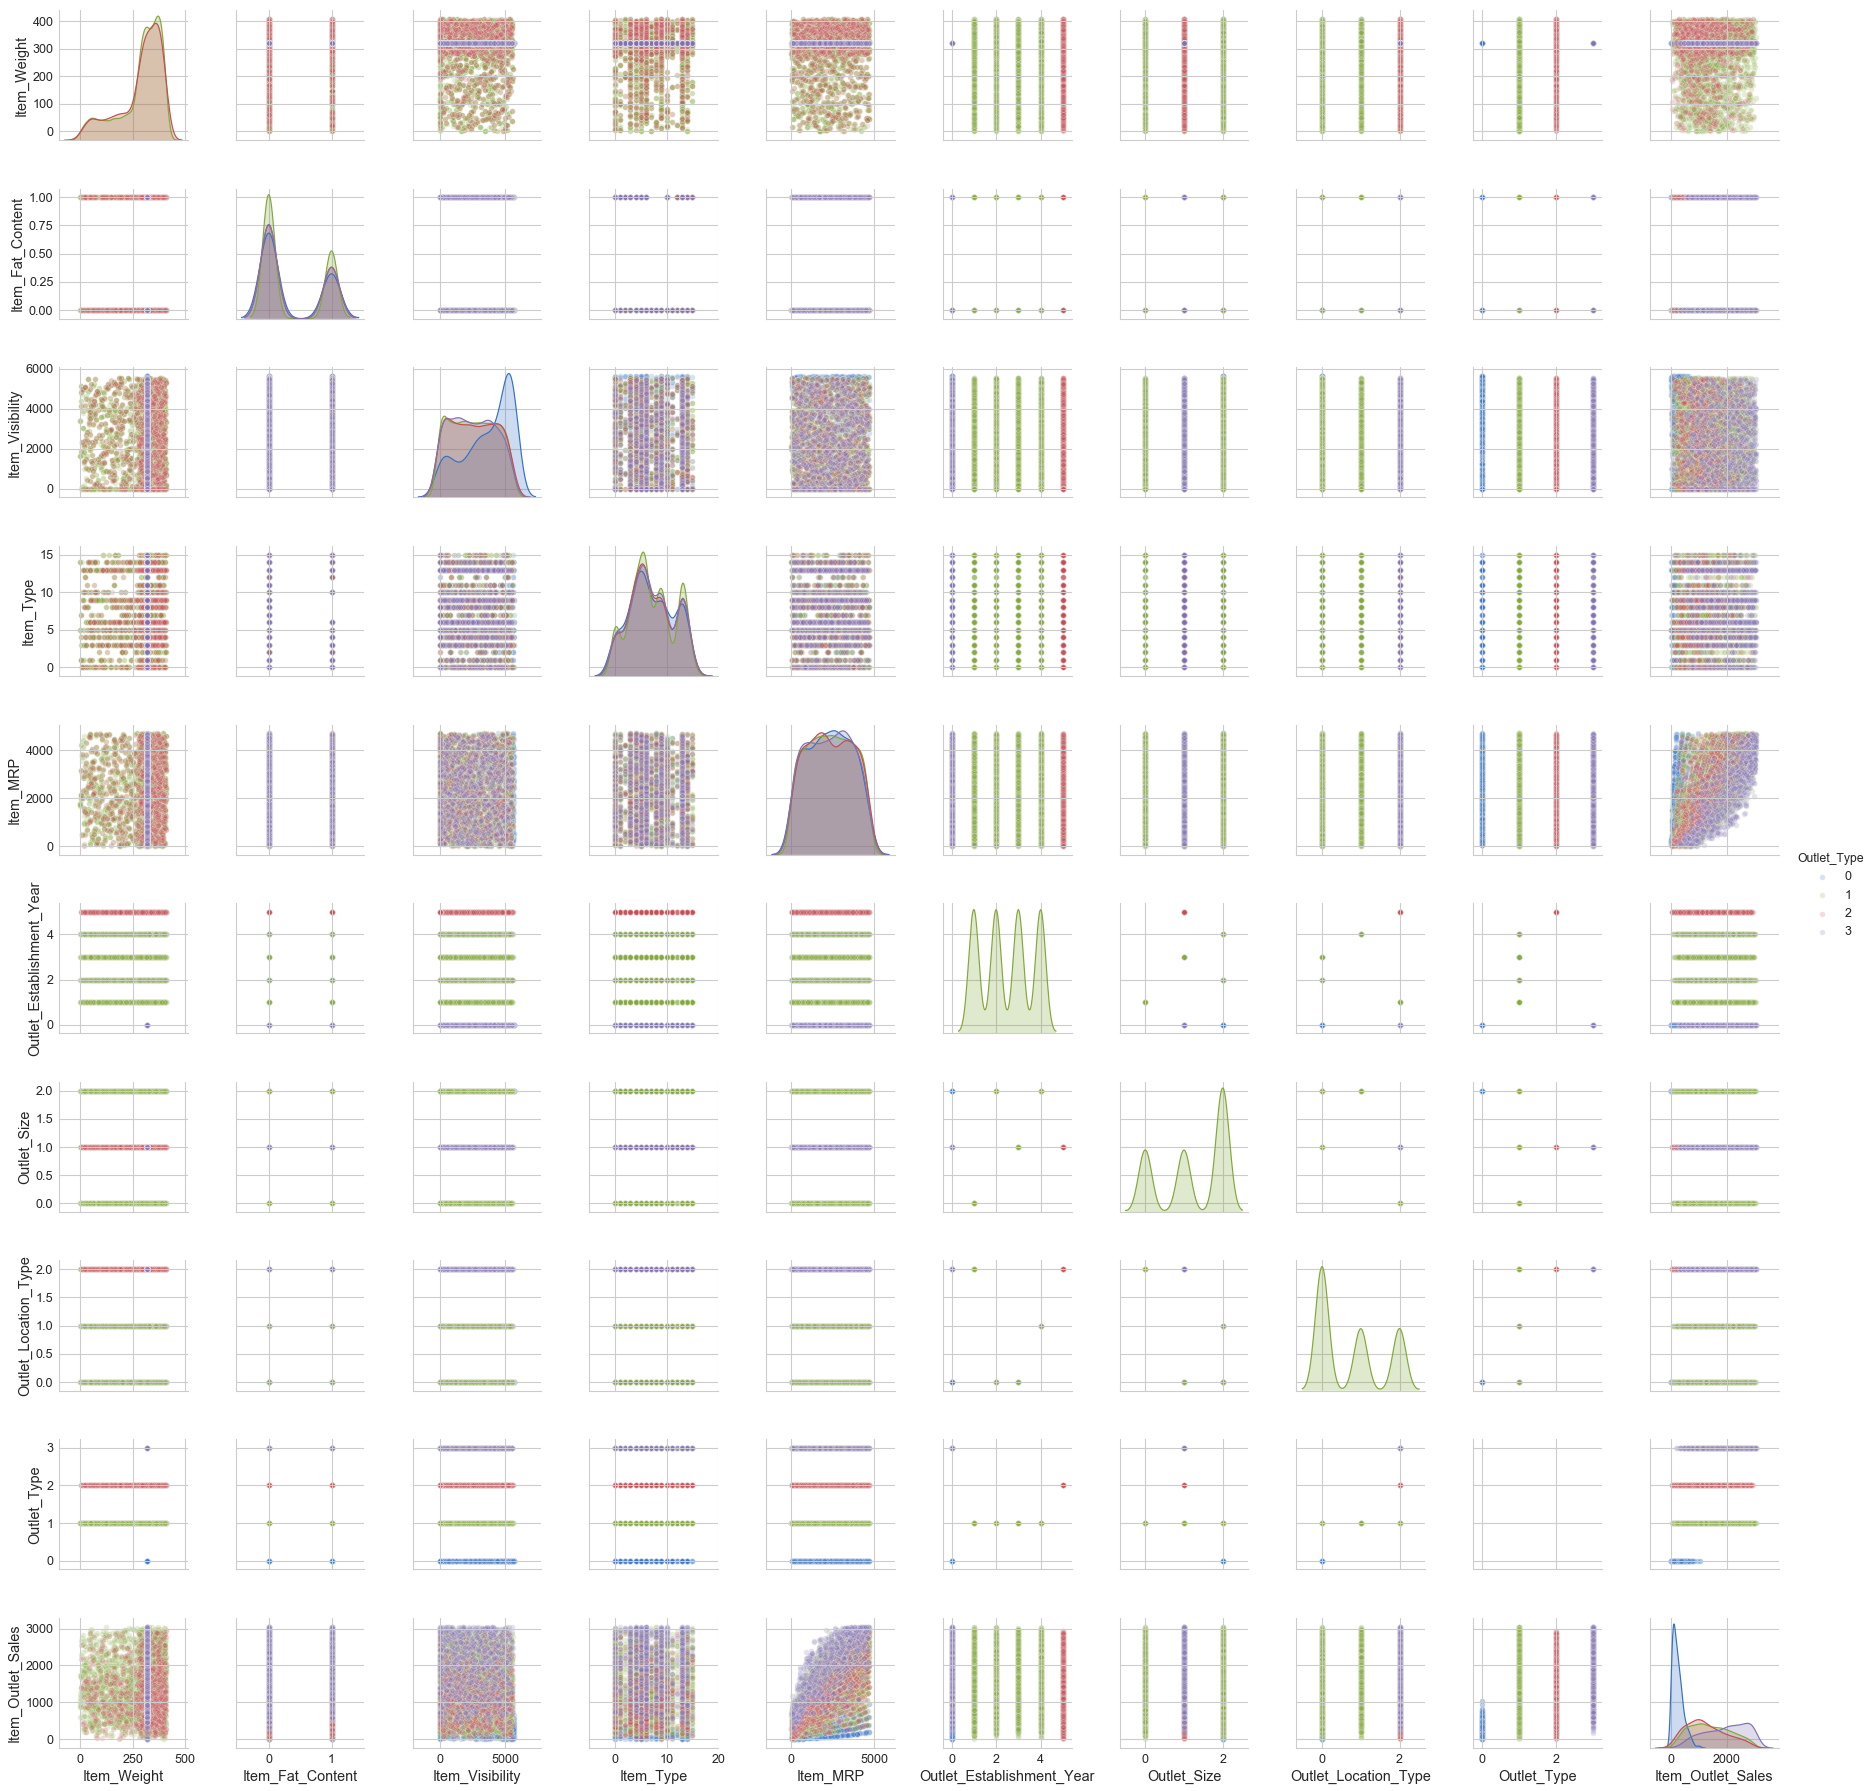

In [444]:
graph = sns.pairplot(data=data_encoder,plot_kws={'alpha':0.2}, hue='Outlet_Type')
graph

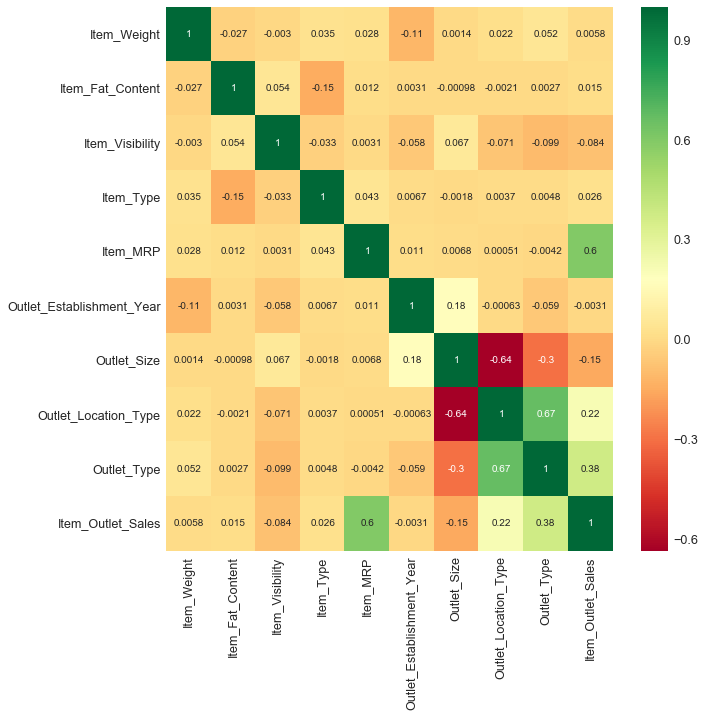

In [445]:
corr=data_encoder.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True, xticklabels=corr.columns.values,ax=ax, yticklabels=corr.columns.values, cmap="RdYlGn")

In [15]:
#По матрице корреляций можно сказать следующее: размер, тип аутлета и тип расположения аутлета имеют явную зависимость
#Также достаточно высокую зависимость имеют максимальная цена за товар и кол-во продаж товара (искомая величина)

In [16]:
print(sc.stats.ttest_ind(data_encoder['Item_Outlet_Sales'], data_encoder['Item_MRP']))
print(sc.stats.ttest_ind(data_encoder['Item_Outlet_Sales'], data_encoder['Outlet_Type']))
print(sc.stats.ttest_ind(data_encoder['Item_Outlet_Sales'], data_encoder['Outlet_Size']))
print(sc.stats.ttest_ind(data_encoder['Item_Outlet_Sales'], data_encoder['Outlet_Location_Type']))
print(sc.stats.ttest_ind(data_encoder['Outlet_Type'], data_encoder['Outlet_Location_Type']))
print(sc.stats.ttest_ind(data_encoder['Outlet_Size'], data_encoder['Outlet_Establishment_Year']))

Ttest_indResult(statistic=-47.38486709791908, pvalue=0.0)
Ttest_indResult(statistic=133.586361330611, pvalue=0.0)
Ttest_indResult(statistic=133.59920544207313, pvalue=0.0)
Ttest_indResult(statistic=133.61569196608897, pvalue=0.0)
Ttest_indResult(statistic=19.10340569955165, pvalue=3.46877978247284e-80)
Ttest_indResult(statistic=-42.6948135932261, pvalue=0.0)


In [17]:
#У всех проверок значения pvalue=0, что говорит о зависимости исследуемых переменных

In [20]:
#Разбивае мна тестовую и тренировочную выборки
x_train, x_test, y_train, y_test = train_test_split(data_encoder.drop('Item_Outlet_Sales', axis = 1), data_encoder['Item_Outlet_Sales'],\
                                                     

In [21]:
sc = StandardScaler()

In [22]:
x_train_trans = sc.fit_transform(x_train)
x_test_trans = sc.fit_transform(x_test)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
#Подберем оптимальные параметры для линейной модели DecisionTreeRegressor
k_range = list(range(1, 31))
a_range= list(['criterion', 'max_depth'])
print(a_range)

['criterion', 'max_depth']


In [24]:
clf = DecisionTreeRegressor(random_state=241)
clf

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=241, splitter='best')

In [25]:
crit_range=list(['mse', 'friedman_mse', 'mae'])
depth_range=list(range(1, 31))
#samp_leaf_range=list(range(1, 10))
#samp_sp_range=list(range(2, 10))

In [26]:
param_grid = dict(criterion=crit_range, max_depth=depth_range)
param_grid

{'criterion': ['mse', 'friedman_mse', 'mae'],
 'max_depth': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [27]:
grid = GridSearchCV(clf, param_grid, cv=10, scoring='explained_variance')

In [28]:
grid.fit(x_train_trans, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=241, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'friedman_mse', 'mae'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='explained_variance', verbose=0)

In [30]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.6156997901599772
{'criterion': 'mse', 'max_depth': 5}
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=241, splitter='best')


In [31]:
clf_best=(grid.best_estimator_)

''

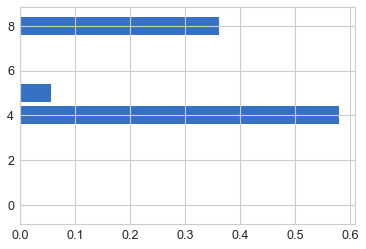

In [32]:
#Выведем признаки по степени важности
clf_best.fit(x_train_trans, y_train)

plt.barh(np.arange(len(clf_best.feature_importances_)), clf_best.feature_importances_)
#plt.yticks(np.arange(len(x_train.columns)),x_train.columns)
''

In [33]:
clf_best.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 2.07373173e-03, 2.48259188e-04,
       5.79427901e-01, 5.61093619e-02, 0.00000000e+00, 0.00000000e+00,
       3.62140746e-01])

In [34]:
#Три самых важных фичи по убыванию степени важности: 
# Item_MRP
# Outlet_Establishment_Year
# Outlet_Type

In [35]:
y_predict=clf_best.predict(x_test_trans)

In [74]:
y_train_predict=clf_best.predict(x_train_trans)

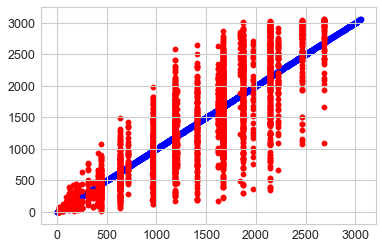

In [112]:
plt.scatter(y_test,y_test, color='blue')
plt.scatter(y_predict,y_test, color='red')
plt.show()

In [37]:
clf_best.score(x_test_trans,y_test)

0.6376631988273123

In [76]:
y_predict_df=pd.DataFrame({'predict1':y_predict.tolist()})
y_train_predict_df=pd.DataFrame({'predict1':y_train_predict.tolist()})

In [92]:
x_train_pr1=x_train
x_train_pr1['predict1']=y_train_predict_df
x_test_pr1=x_test
x_test_pr1['predict1']=y_predict_df

In [93]:
x_train_pr1['predict1']=x_train_pr1['predict1'].fillna(x_train_pr1['predict1'].mean())
x_test_pr1['predict1']=x_test_pr1['predict1'].fillna(x_test_pr1['predict1'].mean())

In [94]:
x_train_pr1_trans=sc.fit_transform(x_train_pr1)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [95]:
x_test_pr1_trans=sc.fit_transform(x_test_pr1)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
lasso=Lasso()
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
#Lasso
t_range=list([0.001, 0.01, 0.1, 1, 10, 100, 1000])
s_range=list(['random', 'cyclic'])
a_range=list([0.001, 0.01, 0.1, 1, 10, 100, 1000])

In [43]:
param_grid = dict(alpha=a_range, selection=s_range, tol=t_range)
param_grid

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'selection': ['random', 'cyclic'],
 'tol': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [44]:
grid = GridSearchCV(lasso, param_grid, cv=10)

In [45]:
grid.fit(x_train_trans, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'selection': ['random', 'cyclic'], 'tol': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
# examine the best Lasso model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.5035464823478591
{'alpha': 1, 'selection': 'random', 'tol': 0.01}
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='random', tol=0.01, warm_start=False)


In [48]:
lasso_best=(grid.best_estimator_)

In [49]:
lasso_best.fit(x_train_trans,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='random', tol=0.01, warm_start=False)

In [98]:
y_predict2=lasso_best.predict(x_test_trans)
y_train_predict2=lasso_best.predict(x_train_trans)

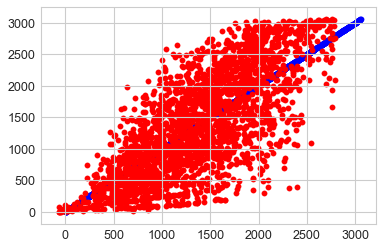

In [113]:
plt.scatter(y_test,y_test, color='blue')
plt.scatter(y_predict2,y_test, color='red')
plt.show()

In [100]:
lasso_best.score(x_test_trans,y_test)

0.5387488445424582

In [101]:
y_predict2_df=pd.DataFrame({'predict1':y_predict2.tolist()})

In [102]:
y_train_predict2_df=pd.DataFrame({'predict1':y_train_predict2.tolist()})

In [103]:
x_train_pr2=x_train_pr1
x_train_pr2['predict2']=y_train_predict2_df
x_train_pr2['predict2']=x_train_pr2['predict2'].fillna(x_train_pr2['predict2'].mean())
x_test_pr2=x_test_pr1
x_test_pr2['predict2']=y_predict2_df
x_test_pr2['predict2']=x_test_pr2['predict2'].fillna(x_test_pr2['predict2'].mean())

In [104]:
x_train_pr2_trans=sc.fit_transform(x_train_pr2)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [105]:
x_test_pr2_trans=sc.fit_transform(x_test_pr2)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [129]:
lr=LogisticRegression(random_state=241)

In [130]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=241, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [131]:
#SVC
c_range=list([0.001, 0.01, 0.1, 1, 10, 100, 1000])
#s_range=list(range(200, 250))
#t_range=list([0.001, 0.01, 0.1, 1, 10, 100, 1000])

In [132]:
param_grid = dict(C=c_range)#, cache_size=s_range
                 # , tol=t_range)
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [133]:
grid = GridSearchCV(lr, param_grid)

In [134]:
grid.fit(x_train_pr2_trans, y_train)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=241, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [135]:
# examine the best Lasso model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.0029997272975184073
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=241, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [136]:
lr_best=(grid.best_estimator_)

In [137]:
lr_best.fit(x_train_pr2_trans,y_train)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=241, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
y_predict_final=lr_best.predict(x_test_pr2_trans)

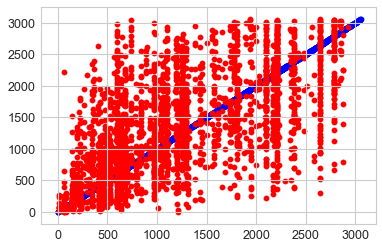

In [139]:
plt.scatter(y_test,y_test, color='blue')
plt.scatter(y_predict_final,y_test, color='red')
plt.show()

In [140]:
#svc_best.score(x_test_pr2_trans,y_test)
lr_best.score(x_test_pr2_trans,y_test)

0.001635322976287817